In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
import random
from sklearn.cluster import OPTICS

In [2]:
df = pd.read_csv('2016-12-31.csv')
df.head()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present
0,2016-12-31,-1261,1320,AGO,purse_seines,9.692361,0.0,1
1,2016-12-31,-991,1275,AGO,trawlers,0.191389,0.0,1
2,2016-12-31,-990,1274,AGO,trawlers,0.233611,0.0,1
3,2016-12-31,-985,1272,AGO,trawlers,0.310000,0.0,1
4,2016-12-31,-982,1271,AGO,trawlers,0.235972,0.0,1


In [3]:
df.tail()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present
179471,2016-12-31,-3329,1716,ZAF,drifting_longlines,0.433889,0.433889,1
179472,2016-12-31,-3329,1722,ZAF,drifting_longlines,0.271806,0.178750,1
179473,2016-12-31,-3329,1721,ZAF,drifting_longlines,0.263194,0.175139,1
179474,2016-12-31,-3329,1715,ZAF,drifting_longlines,0.456528,0.456528,1
179475,2016-12-31,-3329,1720,ZAF,drifting_longlines,0.203750,0.203750,1


In [4]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179476 entries, 0 to 179475
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           179476 non-null  object 
 1   lat_bin        179476 non-null  int64  
 2   lon_bin        179476 non-null  int64  
 3   flag           179476 non-null  object 
 4   geartype       179476 non-null  object 
 5   vessel_hours   179476 non-null  float64
 6   fishing_hours  179476 non-null  float64
 7   mmsi_present   179476 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 11.0+ MB
Index(['date', 'lat_bin', 'lon_bin', 'flag', 'geartype', 'vessel_hours',
       'fishing_hours', 'mmsi_present'],
      dtype='object')


In [5]:
df= df.sample(frac = 0.15) 

In [6]:
df2=df.loc[df.mmsi_present > 1, :]

In [7]:
df2.tail()

,date,lat_bin,lon_bin,flag,geartype,vessel_hours,fishing_hours,mmsi_present
58268,2016-12-31,3000,12256,CHN,trawlers,9.100278,0.000000,11
9302,2016-12-31,2835,12169,CHN,trawlers,0.613611,0.272639,2
53897,2016-12-31,3503,11928,CHN,fixed_gear,0.820556,0.000000,3
24229,2016-12-31,2644,11996,CHN,fixed_gear,13.937361,13.056944,2
18433,2016-12-31,-5319,-7091,CHN,squid_jigger,1.806111,0.000000,2


In [8]:
df.lat_bin = df.lat_bin/100
df.lon_bin = df.lon_bin/100

(Text(0.5, 1.0, 'lon Vs lat'), Text(0.5, 0, 'lon'), Text(0, 0.5, 'lat'))

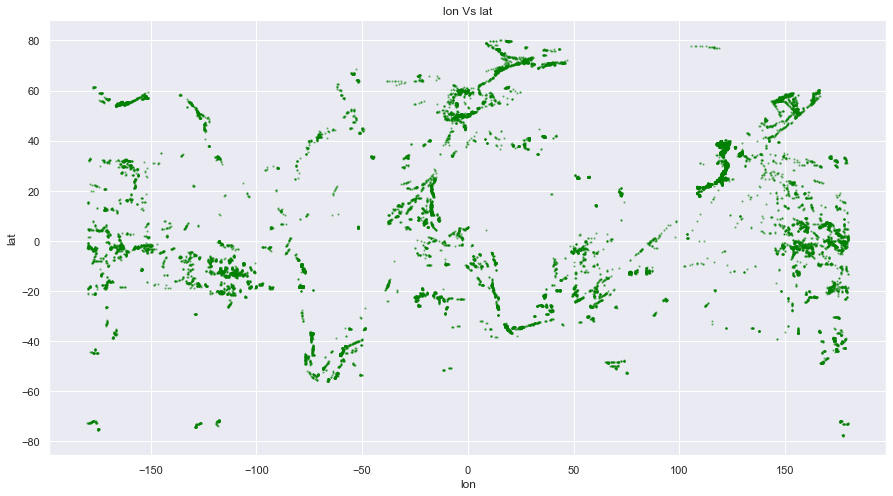

In [9]:
plt.figure(figsize=(15,8))

X1 = df.loc[:,["lon_bin","lat_bin"]]
X1 = X1.values
plt.scatter(X1[:, 0], X1[:, 1], alpha= 0.4, s=np.pi/2, color="green")
plt.title("lon Vs lat"), plt.xlabel('lon'), plt.ylabel('lat')



In [53]:
OC = OPTICS(min_samples=5, max_eps=3, metric='euclidean', cluster_method='dbscan').fit(X1)
OC.fit(X1)
y1 = OC.labels_

In [54]:
colors = []
for i in range(len(y1)):

    r = random.random()
    b = random.random()
    g = random.random()
    colors.append((r, g, b))

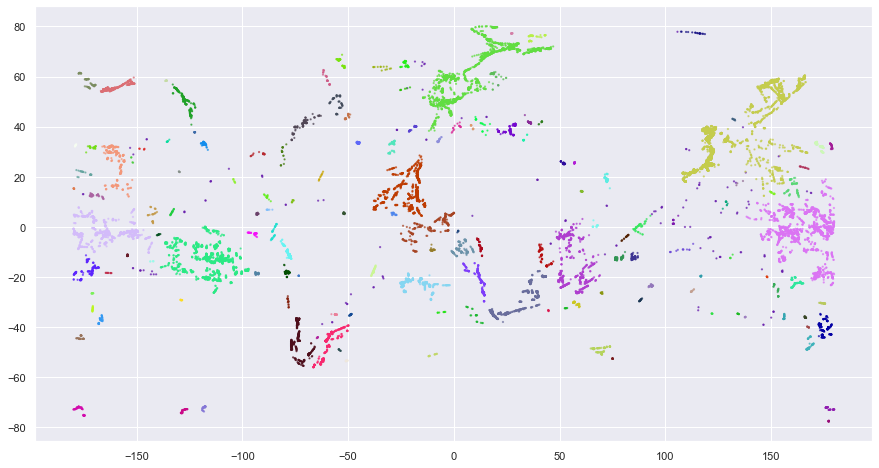

In [55]:
plt.figure(figsize=(15,8))
plt.scatter(X1[:, 0], X1[:, 1], c=[colors[y1[i]] for i in range(len(X1))], s=np.pi/2, cmap='viridis', alpha = 0.6)

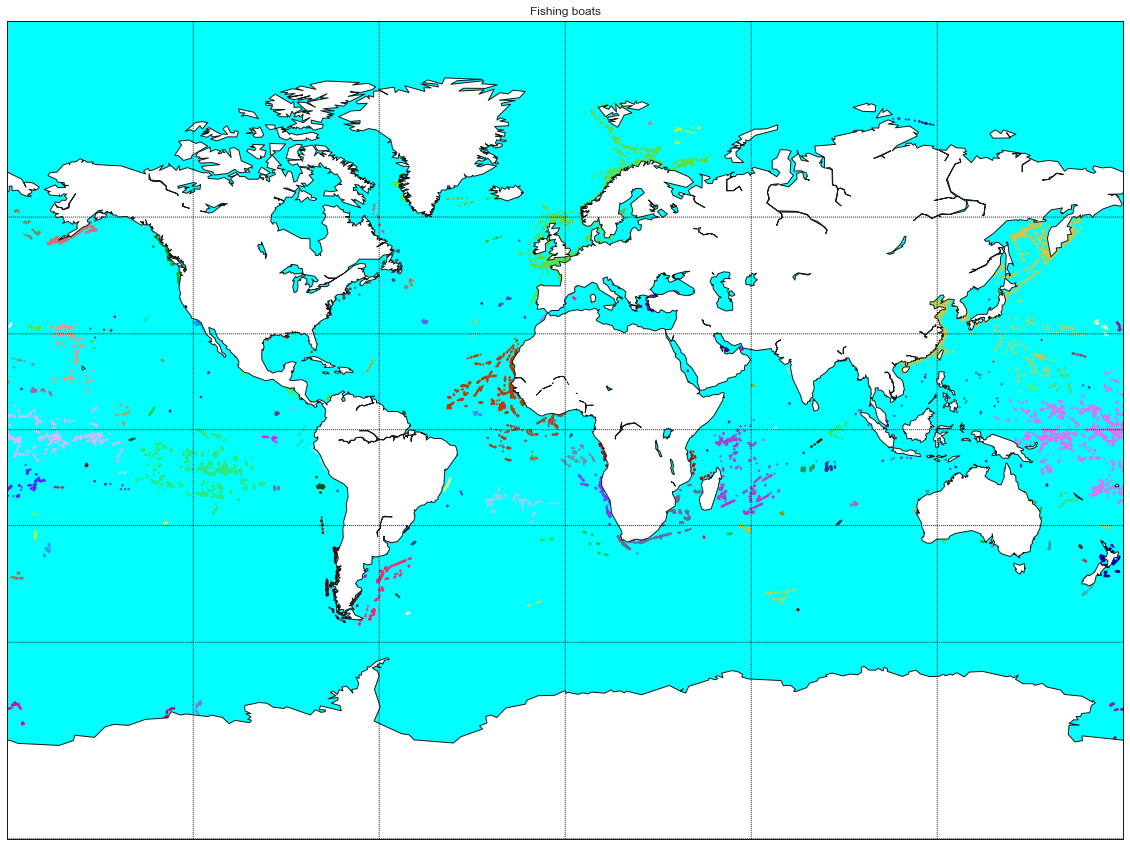

In [57]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x,y = m(X1[:, 0],X1[:, 1])
m.scatter(x,y, c=[colors[y1[i]] for i in range(len(X1))],marker='D', s=np.pi/2, cmap='viridis', alpha = 0.6)

plt.title("Fishing boats")
plt.show()

In [44]:
for i in range(10):
    print(i+1)

1
2
3
4
5
6
7
8
9
10


In [ ]:
# Focus on a region

llat=-14
ulat=51
llon=46
ulon=151

df=df[(df['lon_bin']>llon) & (df['lon_bin']<ulon) & 
      (df['lat_bin']>llat) & (df['lat_bin']<ulat)]
print("Number of final datapoints:",len(df))

In [ ]:
plt.figure(figsize=(20,15))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

lon_array = df.lon_bin.to_numpy()
lat_array = df.lat_bin.to_numpy()
x,y = m(lon_array,lat_array)
m.scatter(x,y,color="green",marker='D',s=np.pi*2)
plt.title("Fishing boats")
plt.show()

In [ ]:
X2 = df.loc[:,["lon_bin","lat_bin"]]
X2 = X2.values

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, n_init= 100)
kmeans.fit(X2)
y2_kmeans = kmeans.predict(X2)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X2[:, 0], X2[:, 1], c=y2_kmeans, s=np.pi/2, cmap='viridis', alpha = 0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

In [ ]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x,y = m(X2[:, 0],X2[:, 1])
m.scatter(x,y, c=y2_kmeans ,marker='D', s=np.pi/2, cmap='viridis', alpha = 0.6)

centers = kmeans.cluster_centers_
x1,y1 = m(centers[:, 0],centers[:, 1])
m.scatter(x1,y1, c='black', s=100, alpha=0.5);

plt.title("Fishing boats")
plt.show()